**Importing the Modules**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from neuralprophet import NeuralProphet

**Reading and processing the Data**

In [30]:
crypto_symbol = input("Enter the CryptoCurrency symbol: ")# e.g 'TSLA',GOOG,APPL
start = input("Enter the start date (YYYY-MM-DD): ")#'2013-01-01'
end = input("Enter the end date (YYYY-MM-DD): ")#'2023-12-31'
data = yf.download(crypto_symbol, start, end)
data.reset_index(inplace=True)
print(data.head())

Enter the CryptoCurrency symbol: DOGE-USD
Enter the start date (YYYY-MM-DD): 2022-01-01
Enter the end date (YYYY-MM-DD): 2023-12-31


[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2022-01-01  0.170510  0.173423  0.170353  0.173035   0.173035  371336089
1 2022-01-02  0.173027  0.175989  0.171201  0.174403   0.174403  391041933
2 2022-01-03  0.174406  0.174406  0.168271  0.170088   0.170088  505900382
3 2022-01-04  0.170151  0.172339  0.168128  0.168803   0.168803  541922892
4 2022-01-05  0.168835  0.170747  0.151898  0.159420   0.159420  994086848


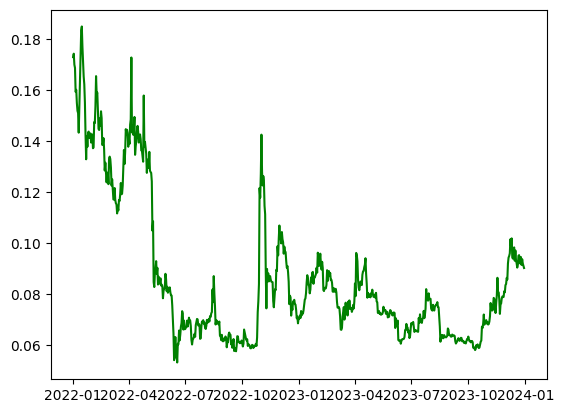

In [31]:
crypto = data[['Date', 'Close']].copy()
crypto.columns = ['ds', 'y']
plt.plot(crypto['ds'], crypto['y'], label='actual', c='g')
plt.show()

**Training the Model**

In [32]:
model=NeuralProphet()
model.fit(crypto,freq="D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

AttributeError: 'Index' object has no attribute '_format_flat'

          MAE      RMSE      Loss  RegLoss  epoch
0    0.059787  0.087518  0.388765      0.0      0
1    0.043080  0.069566  0.256209      0.0      1
2    0.036101  0.055289  0.200164      0.0      2
3    0.028287  0.040603  0.139035      0.0      3
4    0.020849  0.027382  0.079951      0.0      4
..        ...       ...       ...      ...    ...
125  0.007945  0.010404  0.014555      0.0    125
126  0.007928  0.010387  0.014531      0.0    126
127  0.007941  0.010331  0.014539      0.0    127
128  0.007919  0.010325  0.014427      0.0    128
129  0.007935  0.010339  0.014572      0.0    129

[130 rows x 5 columns]

**Model Making the Prediction**

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


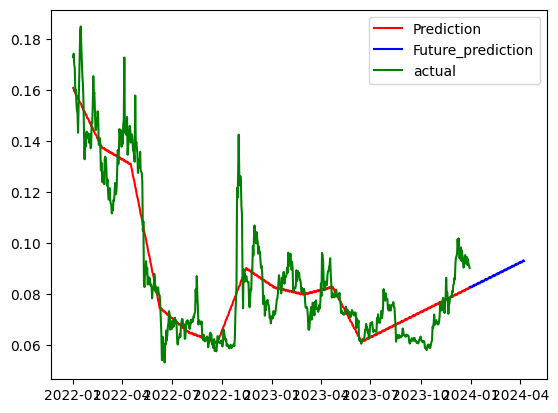

In [33]:
prediction = model.make_future_dataframe(crypto,periods = 100)

forecast = model.predict(prediction)
real_prediction = model.predict(crypto)

plt.plot(real_prediction['ds'],real_prediction['yhat1'],label = "Prediction" , c = 'r')
plt.plot(forecast['ds'],forecast['yhat1'],label = 'Future_prediction',c='b')
plt.plot(crypto['ds'],crypto['y'],label ='actual' ,c='g')
plt.legend()
plt.show()

**TRENDS**

In [34]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
